### Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import calmap
# from pandas_profiling import ProfileReport

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [82]:
df = pd.read_csv('supermarket_sales.csv')

In [83]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [84]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [85]:
df['Date'] 

0        1/5/19
1        3/8/19
2        3/3/19
3       1/27/19
4        2/8/19
         ...   
998     2/22/19
999     2/18/19
1000    2/18/19
1001    3/10/19
1002    1/26/19
Name: Date, Length: 1003, dtype: object

In [86]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

In [87]:
df.set_index('Date', inplace=True)

In [88]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [89]:
df.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               6.131488e-14     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

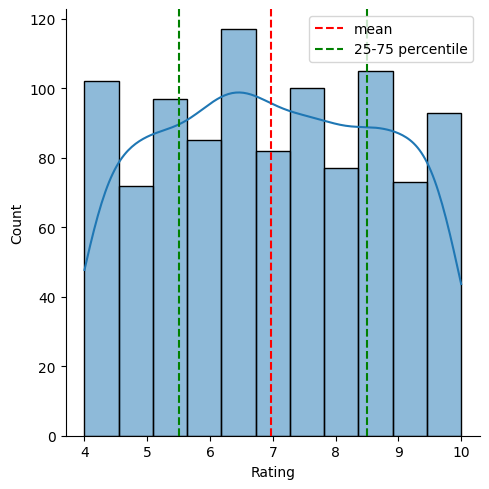

In [90]:
sns.displot(df['Rating'],kde=True)
plt.axvline(x=np.mean(df['Rating']), color="red", ls="--", label="mean")
plt.axvline(x=np.percentile(df['Rating'],25), color="green", ls="--", label='25-75 percentile')
plt.axvline(x=np.percentile(df['Rating'],75), color="green", ls="--")
plt.legend()

array([[<AxesSubplot: title={'center': 'Unit price'}>,
        <AxesSubplot: title={'center': 'Quantity'}>,
        <AxesSubplot: title={'center': 'Tax 5%'}>],
       [<AxesSubplot: title={'center': 'Total'}>,
        <AxesSubplot: title={'center': 'cogs'}>,
        <AxesSubplot: title={'center': 'gross margin percentage'}>],
       [<AxesSubplot: title={'center': 'gross income'}>,
        <AxesSubplot: title={'center': 'Rating'}>, <AxesSubplot: >]],
      dtype=object)

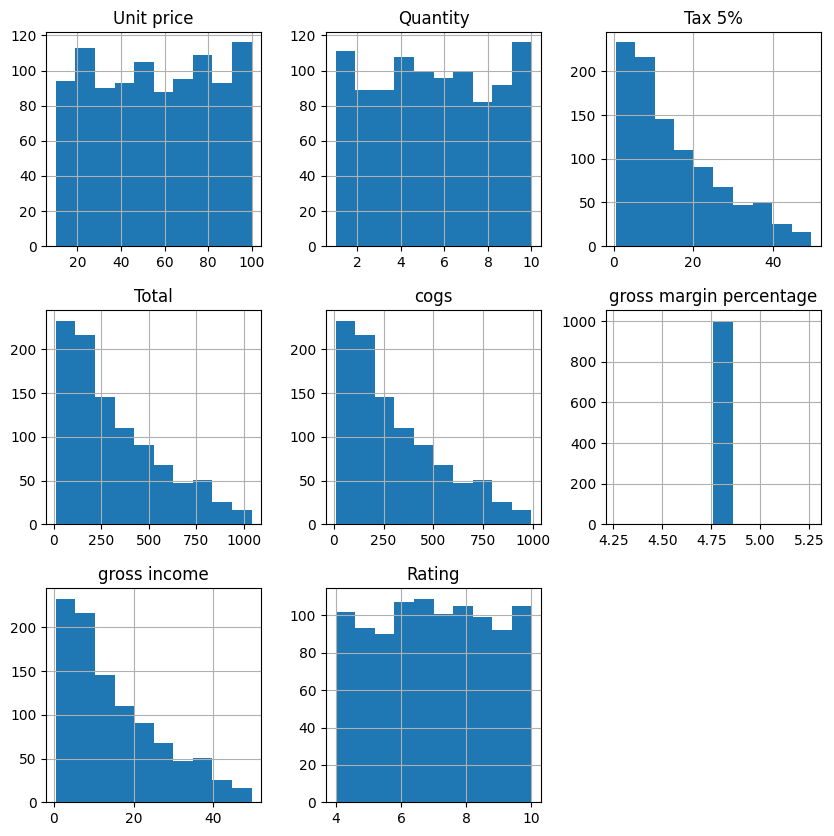

In [91]:

df.hist(figsize=(10,10))

**Question 2:** Do aggregate sales numbers differ by much between branches?

<AxesSubplot: xlabel='Branch', ylabel='count'>

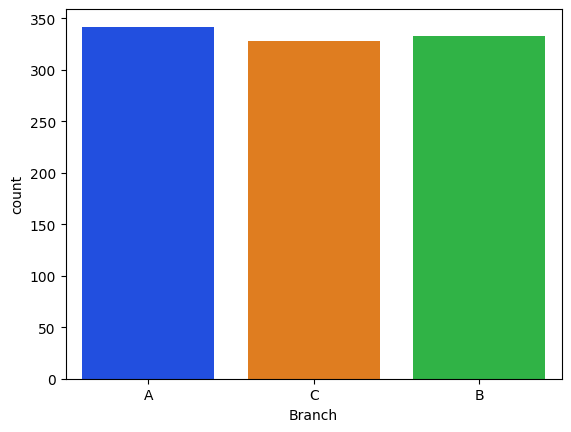

In [92]:
sns.countplot(df, x ='Branch', palette = "bright")

In [93]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

<AxesSubplot: xlabel='Rating', ylabel='gross income'>

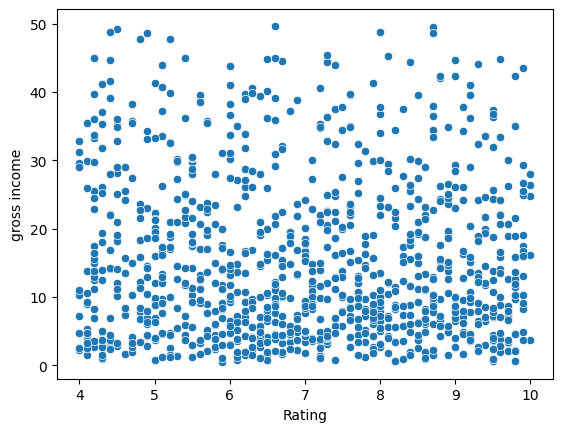

In [94]:
sns.scatterplot(x = df['Rating'], y=df['gross income'])

<AxesSubplot: xlabel='Rating', ylabel='gross income'>

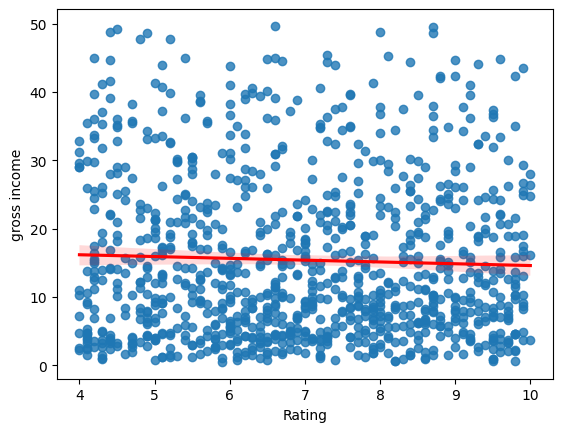

In [95]:
sns.regplot(x=df['Rating'], y=df['gross income'],line_kws={"color": "red"})

<AxesSubplot: xlabel='Branch', ylabel='gross income'>

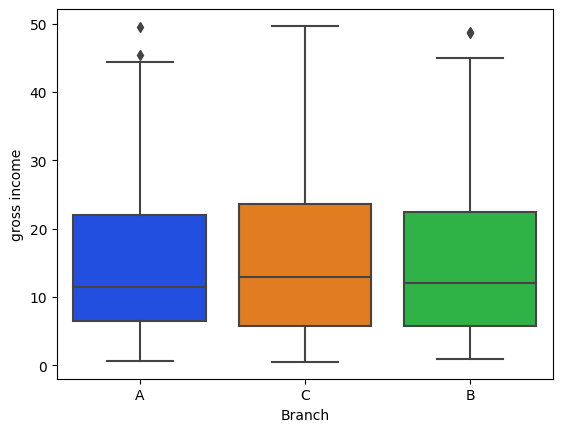

In [96]:
sns.boxplot(y=df['gross income'], x = df['Branch'], palette = "bright")

<AxesSubplot: xlabel='Gender', ylabel='gross income'>

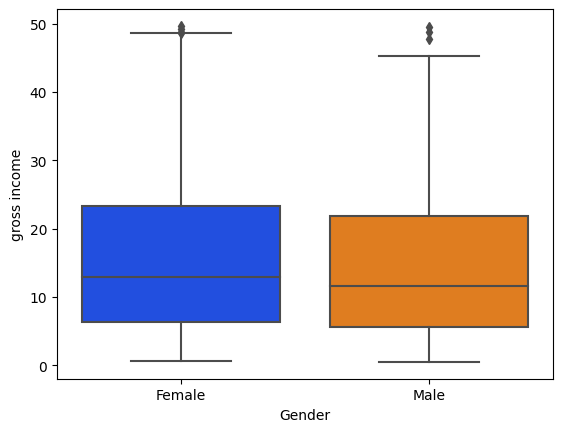

In [97]:
sns.boxplot(y=df['gross income'], x = df['Gender'], palette = "bright")

**Question 4:** Is there a noticeable time trend in gross income?

In [73]:
df2 = df
for column in df.columns:
    df2[column] = pd.to_numeric(df2[column], errors='coerce')

df2 = df2.astype(float)
df2.head()


Invoice ID  Branch  City  Customer type  Gender  Product line  \
Date                                                                        
2019-01-05         NaN     NaN   NaN            NaN     NaN           NaN   
2019-03-08         NaN     NaN   NaN            NaN     NaN           NaN   
2019-03-03         NaN     NaN   NaN            NaN     NaN           NaN   
2019-01-27         NaN     NaN   NaN            NaN     NaN           NaN   
2019-02-08         NaN     NaN   NaN            NaN     NaN           NaN   

            Unit price  Quantity   Tax 5%     Total  Time  Payment    cogs  \
Date                                                                         
2019-01-05       74.69       7.0  26.1415  548.9715   NaN      NaN  522.83   
2019-03-08       15.28       5.0   3.8200   80.2200   NaN      NaN   76.40   
2019-03-03       46.33       7.0  16.2155  340.5255   NaN      NaN  324.31   
2019-01-27       58.22       8.0  23.2880  489.0480   NaN      NaN  465.76   
2019-02-08       86.31       7.0  30.2085  634.3785   NaN      NaN  604.17   

            gross margin percentage  gross income  Rating  
Date                                                       
2019-01-05                 4.761905       26.1415     9.1  
2019-03-08                 4.761905        3.8200     9.6  
2019-03-03                 4.761905       16.2155     7.4  
2019-01-27                 4.761905       23.2880     8.4  
2019-02-08                 4.761905       30.2085     5.3

<AxesSubplot: xlabel='Date', ylabel='gross income'>

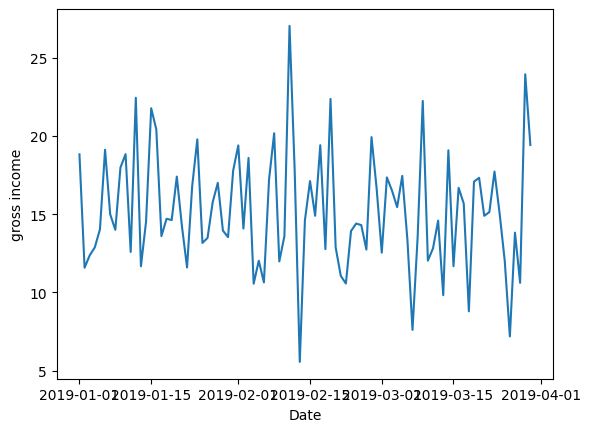

In [74]:
sns.lineplot(x=df2.groupby(df2.index).mean().index, y=df2.groupby(df2.index).mean()['gross income'])

### Task 4: Dealing With Duplicate Rows and Missing Values

In [120]:
df[df.duplicated()==True]

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

In [121]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [122]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [130]:
categorical_columns = ['Customer type', 'Product line']
non_categorical_columns = ['Unit price', 'Quantity']

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values in non-categorical columns with the mean
for col in non_categorical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

df.fillna(0, inplace=True)

<AxesSubplot: ylabel='Date'>

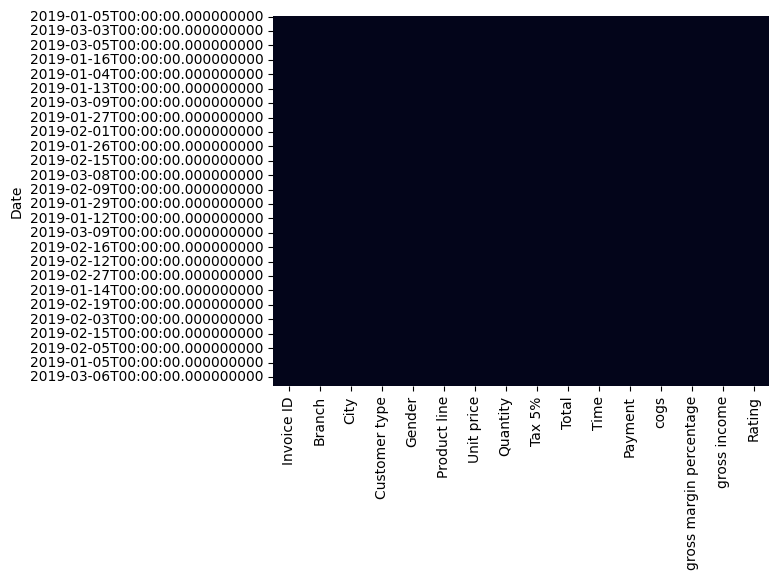

In [131]:
sns.heatmap(df.isnull(),cbar=False)

In [132]:
df3 = pd.read_csv('supermarket_sales.csv')
df3

Invoice ID Branch       City Customer type  Gender  \
0     750-67-8428      A     Yangon        Member  Female   
1     226-31-3081      C  Naypyitaw        Normal  Female   
2     631-41-3108      A     Yangon        Normal    Male   
3     123-19-1176      A     Yangon        Member    Male   
4     373-73-7910      A     Yangon        Normal    Male   
...           ...    ...        ...           ...     ...   
998   347-56-2442      A     Yangon        Normal    Male   
999   849-09-3807      A     Yangon        Member  Female   
1000  849-09-3807      A     Yangon        Member  Female   
1001  745-74-0715      A     Yangon        Normal    Male   
1002  452-04-8808      B   Mandalay        Normal    Male   

                Product line  Unit price  Quantity   Tax 5%     Total  \
0          Health and beauty       74.69       7.0  26.1415  548.9715   
1     Electronic accessories       15.28       5.0   3.8200   80.2200   
2         Home and lifestyle       46.33       7.0  16.2155  340.5255   
3          Health and beauty       58.22       8.0  23.2880  489.0480   
4          Sports and travel       86.31       7.0  30.2085  634.3785   
...                      ...         ...       ...      ...       ...   
998       Home and lifestyle       65.82       1.0   3.2910   69.1110   
999      Fashion accessories       88.34       7.0  30.9190  649.2990   
1000     Fashion accessories       88.34       7.0  30.9190  649.2990   
1001  Electronic accessories         NaN       2.0   5.8030  121.8630   
1002  Electronic accessories       87.08       NaN  30.4780  640.0380   

         Date   Time      Payment    cogs  gross margin percentage  \
0      1/5/19  13:08      Ewallet  522.83                 4.761905   
1      3/8/19  10:29         Cash   76.40                 4.761905   
2      3/3/19  13:23  Credit card  324.31                 4.761905   
3     1/27/19  20:33      Ewallet  465.76                 4.761905   
4      2/8/19  10:37      Ewallet  604.17                 4.761905   
...       ...    ...          ...     ...                      ...   
998   2/22/19  15:33         Cash   65.82                 4.761905   
999   2/18/19  13:28         Cash  618.38                 4.761905   
1000  2/18/19  13:28         Cash  618.38                 4.761905   
1001  3/10/19  20:46      Ewallet  116.06                 4.761905   
1002  1/26/19  15:17         Cash  609.56                 4.761905   

      gross income  Rating  
0          26.1415     9.1  
1           3.8200     9.6  
2          16.2155     7.4  
3          23.2880     8.4  
4          30.2085     5.3  
...            ...     ...  
998         3.2910     4.1  
999        30.9190     6.6  
1000       30.9190     6.6  
1001        5.8030     8.8  
1002       30.4780     5.5  

[1003 rows x 17 columns]

In [133]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df3)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Task 5: Correlation Analysis

In [134]:
np.round(np.corrcoef(df['gross income'], df['Rating'])[0][1],2)

-0.04

In [149]:
np.round(df.corr(),2)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6988\1998717259.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(df.corr(),2)


Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6988\2659990732.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(df.corr(),2), annot=True)


<AxesSubplot: >

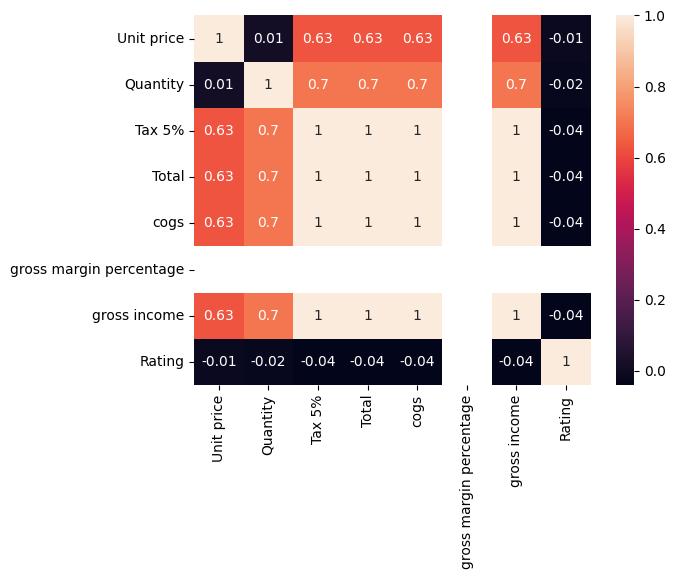

In [151]:
sns.heatmap(np.round(df.corr(),2), annot=True)